### Problem Statement
scipy:

    We have the min and max temperatures in a city In India for each months of the year.
    We would like to find a function to describe this and show it graphically, the dataset
    given below.
Task:
    
    1.fitting it to the periodic function
    2.plot the fit
    Data
    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(start=0,stop=12)

In [3]:
months

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

##### 1.fitting it to the periodic function

In [4]:

def yearlyTemps(times, avg, ampl, offset):
    return (avg + ampl * np.cos((times + offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearlyTemps, months,
                                      Max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearlyTemps, months,
                                      Min, [-40, 20, 0])
print(res_max)
print(res_min)

[ 39.10062829 -11.08724928   2.10332481]
[24.87112259 -7.8989966   1.60673367]


##### 2.plot the fit

In [5]:
days = np.linspace(0, 12, num=365)
days

array([ 0.        ,  0.03296703,  0.06593407,  0.0989011 ,  0.13186813,
        0.16483516,  0.1978022 ,  0.23076923,  0.26373626,  0.2967033 ,
        0.32967033,  0.36263736,  0.3956044 ,  0.42857143,  0.46153846,
        0.49450549,  0.52747253,  0.56043956,  0.59340659,  0.62637363,
        0.65934066,  0.69230769,  0.72527473,  0.75824176,  0.79120879,
        0.82417582,  0.85714286,  0.89010989,  0.92307692,  0.95604396,
        0.98901099,  1.02197802,  1.05494505,  1.08791209,  1.12087912,
        1.15384615,  1.18681319,  1.21978022,  1.25274725,  1.28571429,
        1.31868132,  1.35164835,  1.38461538,  1.41758242,  1.45054945,
        1.48351648,  1.51648352,  1.54945055,  1.58241758,  1.61538462,
        1.64835165,  1.68131868,  1.71428571,  1.74725275,  1.78021978,
        1.81318681,  1.84615385,  1.87912088,  1.91208791,  1.94505495,
        1.97802198,  2.01098901,  2.04395604,  2.07692308,  2.10989011,
        2.14285714,  2.17582418,  2.20879121,  2.24175824,  2.27

Text(0, 0.5, 'Temperature')

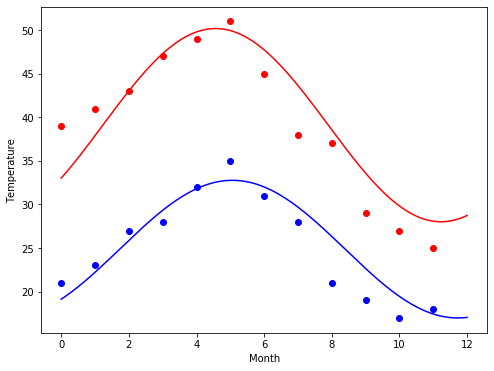

In [6]:
plt.figure(figsize=(8,6))
plt.plot(months, Max, 'ro')
plt.plot(days, yearlyTemps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearlyTemps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')